In [1]:
import pandas as pd
import numpy as np
import sqlite3
import sys
import time
import datetime

from datetime import datetime
from localSettings import *


In [9]:
filename = 'incoming/dane_hydrologiczne/2014/codz_2014_03.csv'

df = pd.read_csv(filename,encoding='windows-1250',header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9
0,149180020,CHAŁUPKI,Odra (1),2014,3,1,107,17.7,99.9,1
1,149180020,CHAŁUPKI,Odra (1),2014,3,2,106,17.2,99.9,1
2,149180020,CHAŁUPKI,Odra (1),2014,3,3,105,17.0,99.9,1
3,149180020,CHAŁUPKI,Odra (1),2014,3,4,104,16.5,99.9,1
4,149180020,CHAŁUPKI,Odra (1),2014,3,5,105,16.8,99.9,1


In [2]:
run calculateAgregates.py


Hello World!
SELECT discharge,temperature,level,measurement_date from measurements where gauge_code=152210090


In [8]:

ww=pd.DataFrame(df.loc[:,0])
ww.head()
codes = ww.drop_duplicates()

,0
0,149180020
1,149180020
2,149180020
3,149180020
4,149180020


In [57]:
index=pd.to_datetime(dd)
pd.DataFrame(data=pomiary)
pomiary=pomiary.rename(columns={6:'level',7:'discharge',8:'temperature'})
pomiary=pomiary.set_index(pd.to_datetime(dd))

In [62]:
pomiary['code']=code

In [64]:
pomiary=pomiary.replace('99.9','None')

,level,discharge,temperature,code
2014-01-01,107,17.7,None,149180020
2014-01-02,106,17.2,None,149180020
2014-01-03,105,17.0,None,149180020
2014-01-04,104,16.5,None,149180020
2014-01-05,105,16.8,None,149180020
2014-01-06,110,18.8,None,149180020
2014-01-07,108,18.0,None,149180020
2014-01-08,106,17.3,None,149180020
2014-01-09,105,16.9,None,149180020
2014-01-10,111,19.3,None,149180020


In [68]:
pomiary.shape[0]

31

In [83]:
ww=pd.DataFrame(df.loc[:,0])
codes = ww.drop_duplicates()
codes[0]

0        149180020
31       149180300
62       149180010
93       150180060
124      150180030
155      150170240
186      150170290
217      150170130
248      150170090
279      150170040
310      151170030
341      151160170
372      151160150
403      151160130
434      151160060
465      151150150
496      152150130
527      152150050
558      152140130
589      152140090
620      152140050
651      152140060
682      152140020
713      152140010
744      153140020
775      153140030
806      153140050
837      150170160
868      150170170
899      149180130
           ...    
25545    153200170
25576    153200090
25607    153200120
25638    153200110
25669    153200100
25700    153200130
25731    154200040
25762    154210020
25793    153210030
25824    154210030
25855    154210050
25886    154210060
25917    154210070
25948    154210080
25979    154210100
26010    154220050
26041    154220110
26072    154220010
26103    154220100
26134    154230010
26165    154220080
26196    154

TypeError: unorderable types: float() <= str()

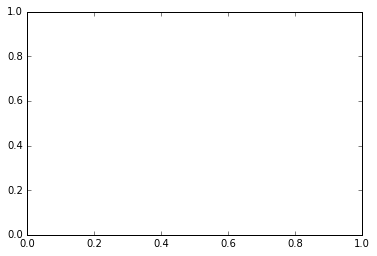

In [5]:
%matplotlib inline
mes['discharge'].hist()



In [18]:
mes.dtypes
mes2=mes.convert_objects(convert_numeric=True)
mes2.dtypes

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


discharge                  float64
temperature                float64
level                      float64
measurement_date    datetime64[ns]
dtype: object

In [25]:
mes2=mes2.set_index('measurement_date')

In [29]:
gb=mes2.groupby(mes2.index.month)



In [30]:
type(gb)

pandas.core.groupby.DataFrameGroupBy

In [55]:
df=mes2.groupby(pd.Grouper(freq='M')).median()

In [56]:
df=df.dropna(how='all')

In [66]:
%run calculateAgregates.py

Hello World!
SELECT discharge,temperature,level,measurement_date from measurements where gauge_code=152210090


/home/marcin/pogodynka/calculateAgregates.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  mes=mes.convert_objects(convert_numeric=True)


In [80]:

df_max.columns=['WQ','WT','WW']
df_min.columns=['NQ','NT','NW']
df_median.columns=['ZQ','ZT','ZW']
df_mean.columns=['SQ','ST','SW']

3**10

59049

In [100]:
df=pd.concat([df_max,df_min,df_median,df_mean],axis=1)

mT = df[['NT','ST','ZT','WT']].copy()
mQ = df[['NQ','SQ','ZQ','WQ']].copy()
mW = df[['NW','SW','ZW','WW']].copy()


In [101]:
df_mean.head()


,SQ,ST,SW
measurement_date,,,
1950-11-30,134.466667,NaN,NaN
1950-12-31,194.354839,NaN,NaN
1951-01-31,88.706452,NaN,NaN
1951-02-28,78.696429,NaN,NaN
1951-03-31,298.161290,NaN,NaN


In [103]:
mQ.head()

,NQ,SQ,ZQ,WQ
measurement_date,,,,
1950-11-30,98.0,134.466667,125.0,195
1950-12-31,87.0,194.354839,187.0,338
1951-01-31,60.0,88.706452,88.0,112
1951-02-28,52.5,78.696429,78.5,115
1951-03-31,100.0,298.161290,198.0,605


{150190080: 'RADOCHA',
 153210130: 'GŁODOWO',
 152150020: 'STARY RADUSZEC',
 153190060: 'RYPIN',
 150190090: 'DĄBROWA GÓRNICZA',
 151209996: 'KAMION',
 151209997: 'TOMASZÓW MAZ-BIAŁOBRZEGI',
 151209998: 'TOMASZÓW MAZ.-BRZOSTÓWKA',
 151209999: 'TOMASZÓW MAZOWIECKI',
 153210200: 'MALDANIN',
 154170220: 'RĄBKA',
 150190100: 'NIWKA',
 153210210: 'NOWOGRÓD',
 152150040: 'GORZÓW WIELKOPOLSKI',
 153220100: 'BURZYN',
 151210010: 'WĄCHOCK',
 152170160: 'KOSEWO',
 152219994: 'EMÓW',
 150190110: 'NIWKA',
 154169997: 'SŁAWNO',
 149190320: 'ZAKOPANE-DOL.STRĄŻYSKA',
 152150050: 'NIETKÓW',
 151210020: 'MICHAŁÓW',
 150190120: 'PRZECZYCE',
 152180060: 'POSOKA',
 152150060: 'PRZEŁAZY',
 150160050: 'WAŁBRZYCH-PODGÓRZE',
 151210030: 'LESIÓW',
 152219997: 'PUŁTUSK',
 150190130: 'ŁAGISZA',
 152219998: 'PIASECZNO 1',
 152150070: 'BOREK',
 151210040: 'BRODY IŁŻECKIE',
 151140020: 'PLEŚNO',
 150190140: 'BIERUŃ NOWY',
 152150080: 'SANTOK',
 151210050: 'GUSIN',
 153140110: 'OKUNICA',
 153190070: 'BACHOTEK',
 150